
Task-1:- Computer Graphics – 2D Scaling Transformation


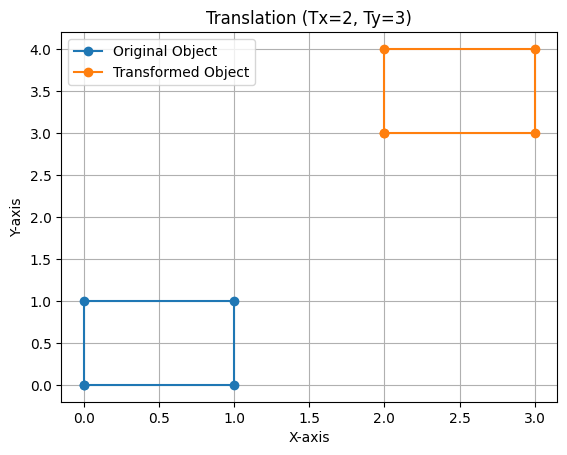

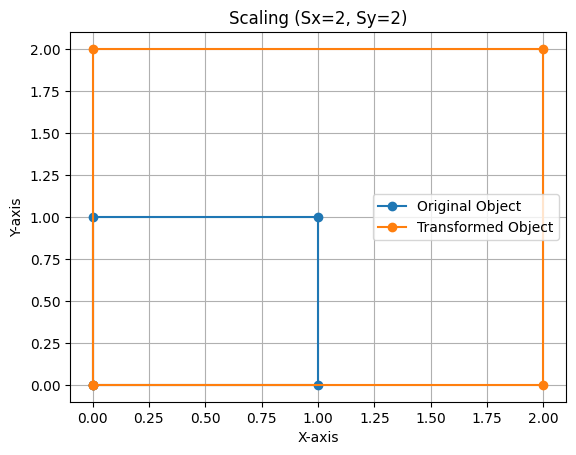

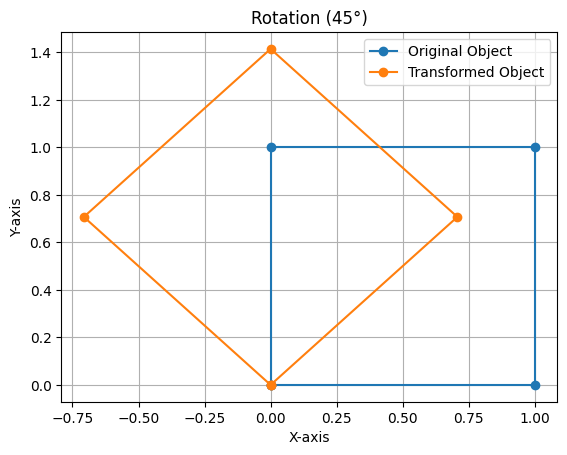

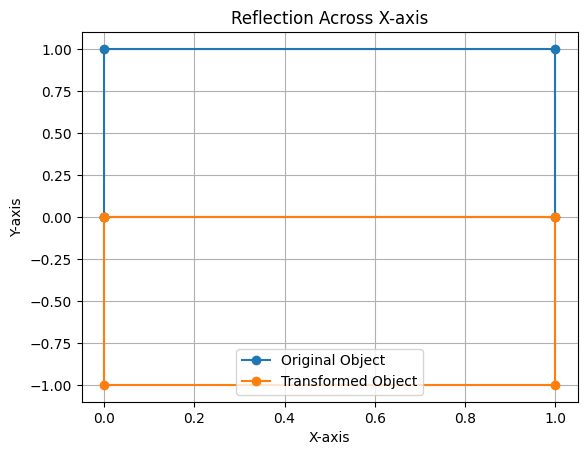

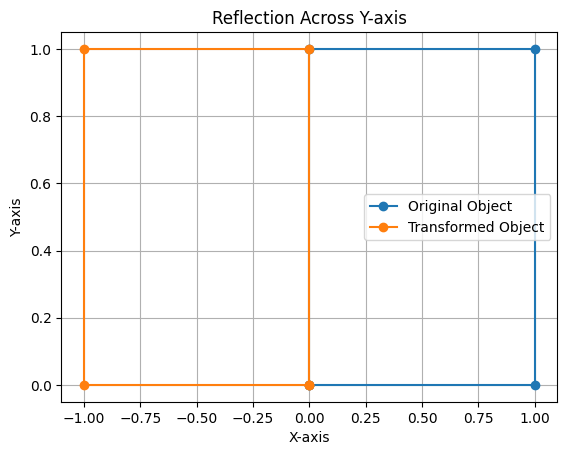

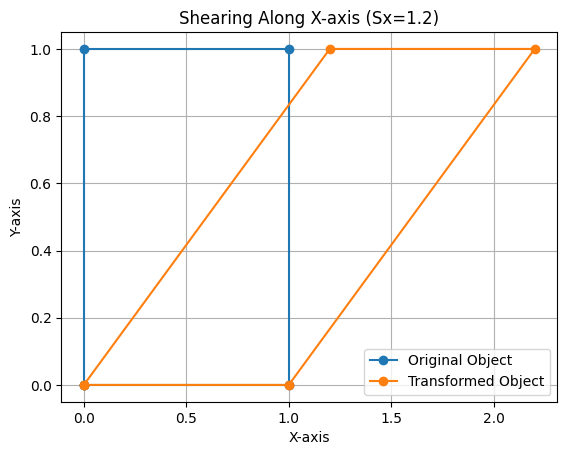

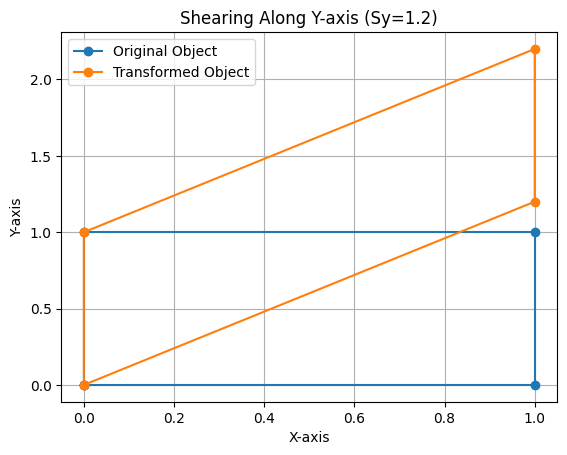

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def transform_object(points, transformation_matrix):

    ones = np.ones((points.shape[0], 1))
    homogeneous_points = np.hstack([points, ones])


    transformed_points = np.dot(homogeneous_points, transformation_matrix.T)


    return transformed_points[:, :2]


rectangle = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])


def translation(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

def scaling(sx, sy):
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]])

def rotation(theta):
    rad = np.radians(theta)
    return np.array([[np.cos(rad), -np.sin(rad), 0],
                     [np.sin(rad), np.cos(rad), 0],
                     [0, 0, 1]])

def reflection(axis):
    if axis == 'x':
        return np.array([[1, 0, 0],
                         [0, -1, 0],
                         [0, 0, 1]])
    elif axis == 'y':
        return np.array([[-1, 0, 0],
                         [0, 1, 0],
                         [0, 0, 1]])

def shearing(sx, sy):
    return np.array([[1, sx, 0],
                     [sy, 1, 0],
                     [0, 0, 1]])


translated_rectangle = transform_object(rectangle, translation(2, 3))
scaled_rectangle = transform_object(rectangle, scaling(2, 2))
rotated_rectangle = transform_object(rectangle, rotation(45))
reflected_x_rectangle = transform_object(rectangle, reflection('x'))
reflected_y_rectangle = transform_object(rectangle, reflection('y'))
sheared_x_rectangle = transform_object(rectangle, shearing(1.2, 0))
sheared_y_rectangle = transform_object(rectangle, shearing(0, 1.2))


def plot_objects(original, transformed, title):
    plt.figure()
    plt.plot(original[:, 0], original[:, 1], label="Original Object", marker="o")
    plt.plot(transformed[:, 0], transformed[:, 1], label="Transformed Object", marker="o")
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid()
    plt.show()

plot_objects(rectangle, translated_rectangle, "Translation (Tx=2, Ty=3)")
plot_objects(rectangle, scaled_rectangle, "Scaling (Sx=2, Sy=2)")
plot_objects(rectangle, rotated_rectangle, "Rotation (45°)")
plot_objects(rectangle, reflected_x_rectangle, "Reflection Across X-axis")
plot_objects(rectangle, reflected_y_rectangle, "Reflection Across Y-axis")
plot_objects(rectangle, sheared_x_rectangle, "Shearing Along X-axis (Sx=1.2)")
plot_objects(rectangle, sheared_y_rectangle, "Shearing Along Y-axis (Sy=1.2)")

Task-2:- Image Transformations using OpenCV in python

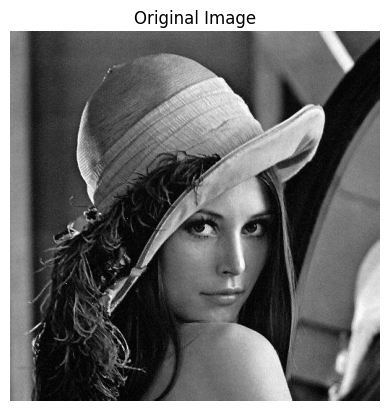

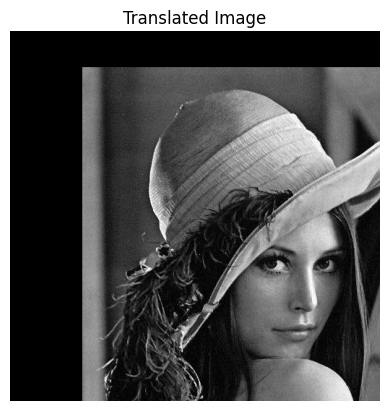

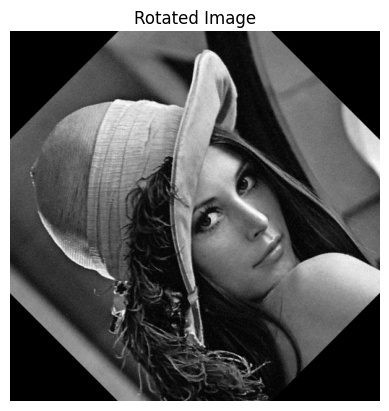

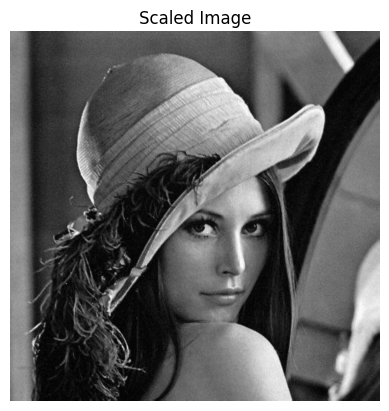

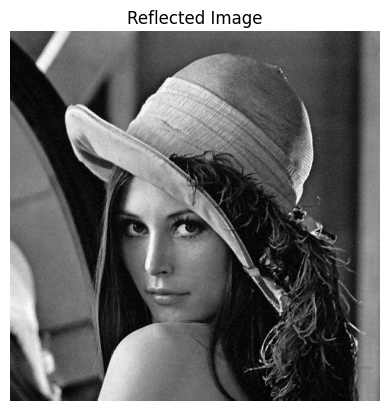

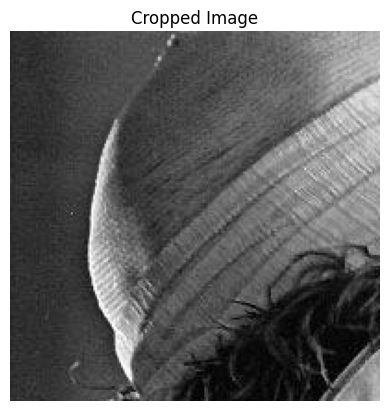

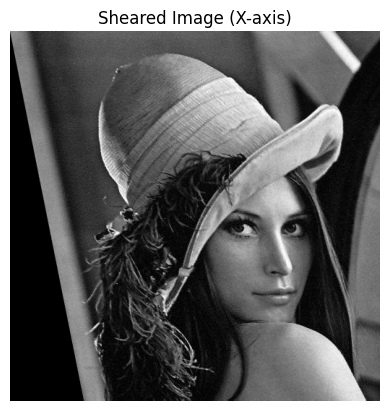

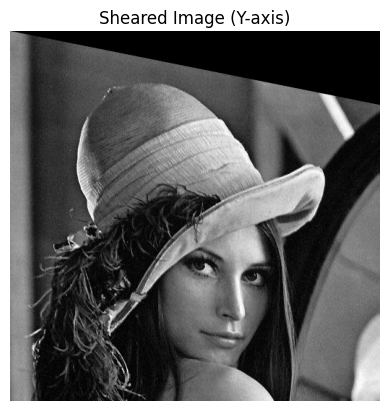

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("/content/Lab-1 B-31 33 35 36 38.pdf-image-000.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


def display_image(title, img):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, translation_matrix, (cols, rows))


def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))


def scale_image(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy)


def reflect_image(image, axis):
    if axis == "x":
        return cv2.flip(image, 0)
    elif axis == "y":
        return cv2.flip(image, 1)


def crop_image(image, x, y, width, height):
    return image[y:y + height, x:x + width]


def shear_image(image, shear_factor, axis="x"):
    rows, cols = image.shape[:2]
    if axis == "x":
        shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    else:
        shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    return cv2.warpAffine(image, shear_matrix, (cols, rows))


translated_image = translate_image(image, 100, 50)
rotated_image = rotate_image(image, 45)
scaled_image = scale_image(image, 1.5, 1.5)
reflected_image = reflect_image(image, "y")
cropped_image = crop_image(image, 50, 50, 200, 200)
sheared_image_x = shear_image(image, 0.2, "x")
sheared_image_y = shear_image(image, 0.2, "y")


display_image("Original Image", image)
display_image("Translated Image", translated_image)
display_image("Rotated Image", rotated_image)
display_image("Scaled Image", scaled_image)
display_image("Reflected Image", reflected_image)
display_image("Cropped Image", cropped_image)
display_image("Sheared Image (X-axis)", sheared_image_x)
display_image("Sheared Image (Y-axis)", sheared_image_y)
